# Statistics - Micro Project:  Building Material

   - Case study: Quality Control in Concrete 

## Problem :

     - quality inconsistencies

## Objective :
    - concrete compressive strength is a quantitative quantity, and  finding the factors that influence concrete compressive strength. 

In [105]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Concrete Data :

In [2]:
df = pd.read_csv(r"E:\study\statistics\Concrete_Data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Data Features:
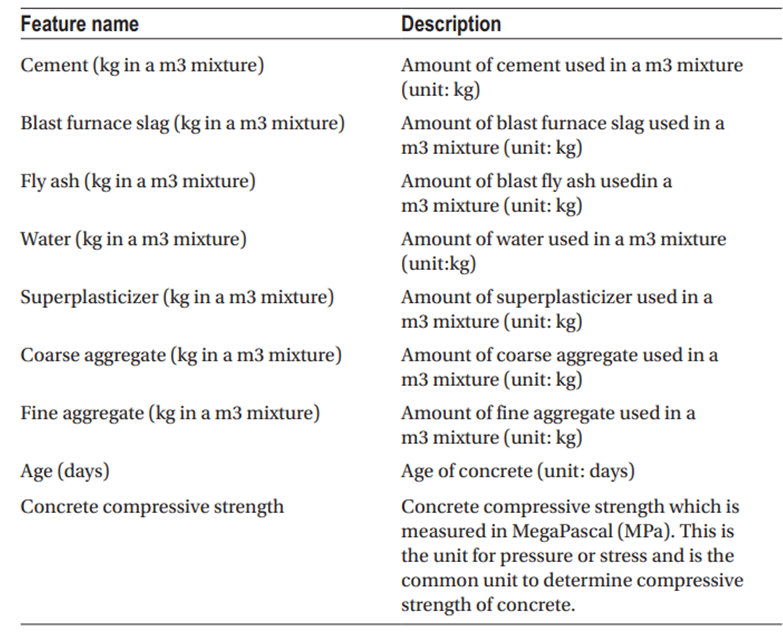


## Data Information:

In [11]:
df.shape

(1030, 9)

In [53]:
print(f'The Concrete Dataset has {df.shape[0]} columns and {df.shape[1]} rows')

The Concrete Dataset has 1005 columns and 9 rows


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

###  Checking for missing values:

In [4]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

### Basic Statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [ ]:
# Inferences :
# Slag and ash, age has wide difference in mean and 50% values,indicating mean > median, so being a right tailed skewness in data.
# Also, slag and ash, superplastic has min value as 0, which cannot be in the composition of cement.

### Column List:

In [6]:
df.columns.to_list()

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

### Renaming Columns:

In [7]:
# Renaming Columns

df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
 'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
 'Water  (component 4)(kg in a m^3 mixture)':'water',
 'Superplasticizer (component 5)(kg in a m^3 mixture)':'super_plasticizer',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate',
 'Age (day)':'age',
 'Concrete compressive strength(MPa, megapascals) ':'concrete_compressive_strength'},inplace= True)

In [8]:
df.columns.to_list()

['cement',
 'slag',
 'fly_ash',
 'water',
 'super_plasticizer',
 'coarse_aggregate',
 'fine_aggregate',
 'age',
 'concrete_compressive_strength']

### Removing duplicate data:

In [17]:
# removing duplicate data

df = df.drop_duplicates()
df

,cement,slag,fly_ash,water,super_plasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [55]:
print(f'The no. of coulmns and rows changes after dropping duplicate datasets :{df.shape}')

the no. of coulmns and rows changes after dropping duplicate datasets :(1005, 9)


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
fly_ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
super_plasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarse_aggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fine_aggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
concrete_compressive_strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


## Data visualisation:


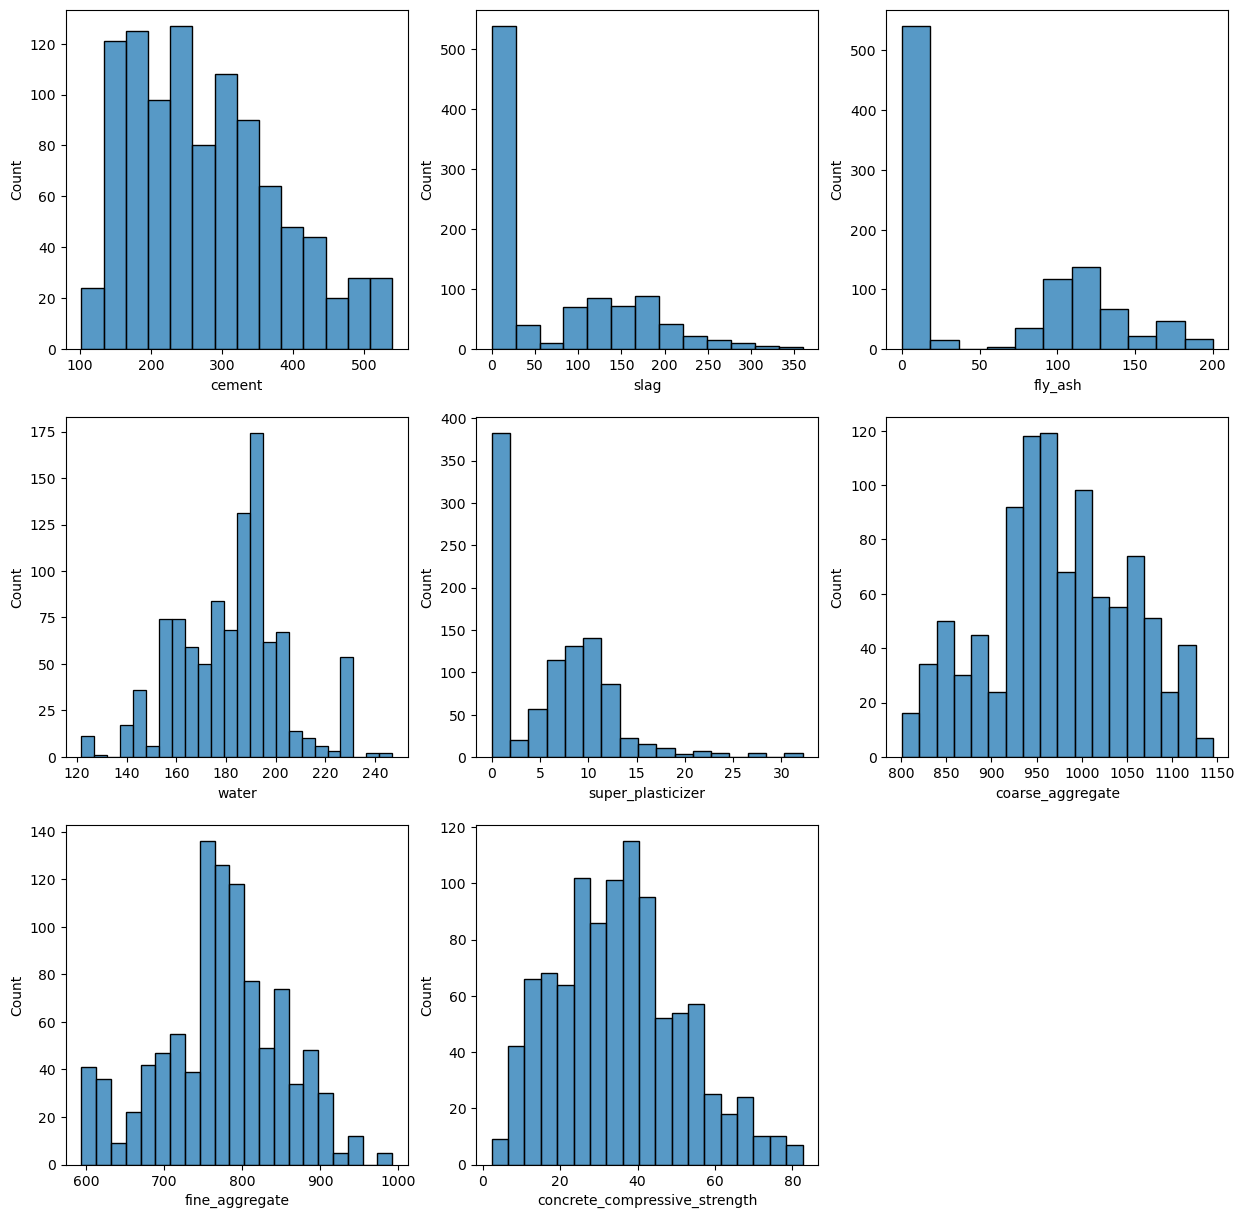

In [60]:
plt.figure(figsize = (15, 15))
for idx,col in enumerate(df.columns,start=1):
    if idx==8:
        continue
    elif idx>8:
        idx=idx-1
    plt.subplot(3,3,idx)
    sns.histplot(data=df, x=col)

In [ ]:
## Inferences:

 
 ##  1. Note for the variables of slag, fly ash, and superplasticizer, we have a lot of mixes with values of 0. 
   
    
##   2. In general, these components are the most expensive in concrete mixes and can be thought of as "add-ons", 
##      so it is reasonable that most mixes will not contain a lot of these components. 

   
##   3. also that for fly ash there is not much data between 25-75 kg/m^3

<AxesSubplot:>

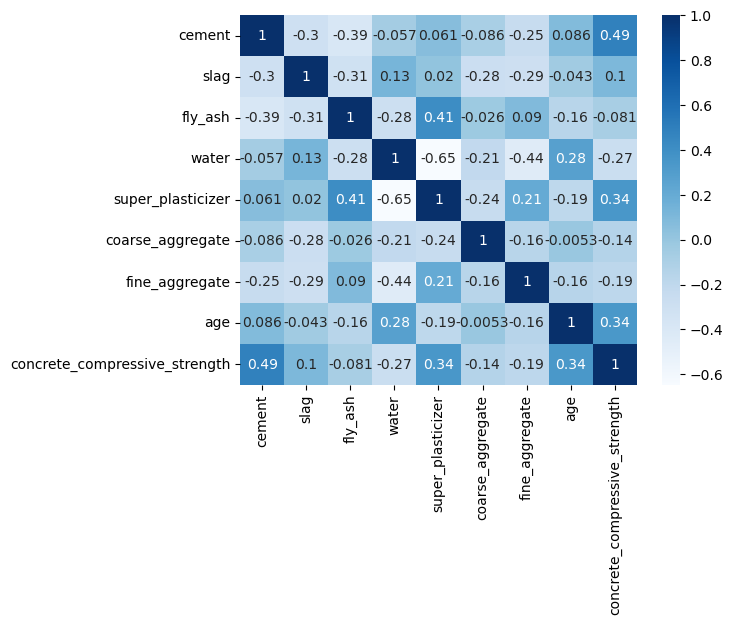

In [33]:
##correlation using heatmapp

sns.heatmap(df.corr(),annot=True,cmap='Blues')

Inferences:

 1. We can observe a high positive correlation between compressive Strength  and Cement. this is true because strength         concrete indeed increases with an increase in the amount of cement used in preparing it. 
 
 
 2. Also, Age and Super Plasticizer are the other two factors influencing Compressive strength.
 

 3. There are other strong correlations between the features,

     a> A strong negative correlation between Super Plasticizer and Water.
     
     b> positive correlations between Super Plasticizer and Fly Ash, Fine Aggregate.

In [ ]:
## corrlelation using Pairplot

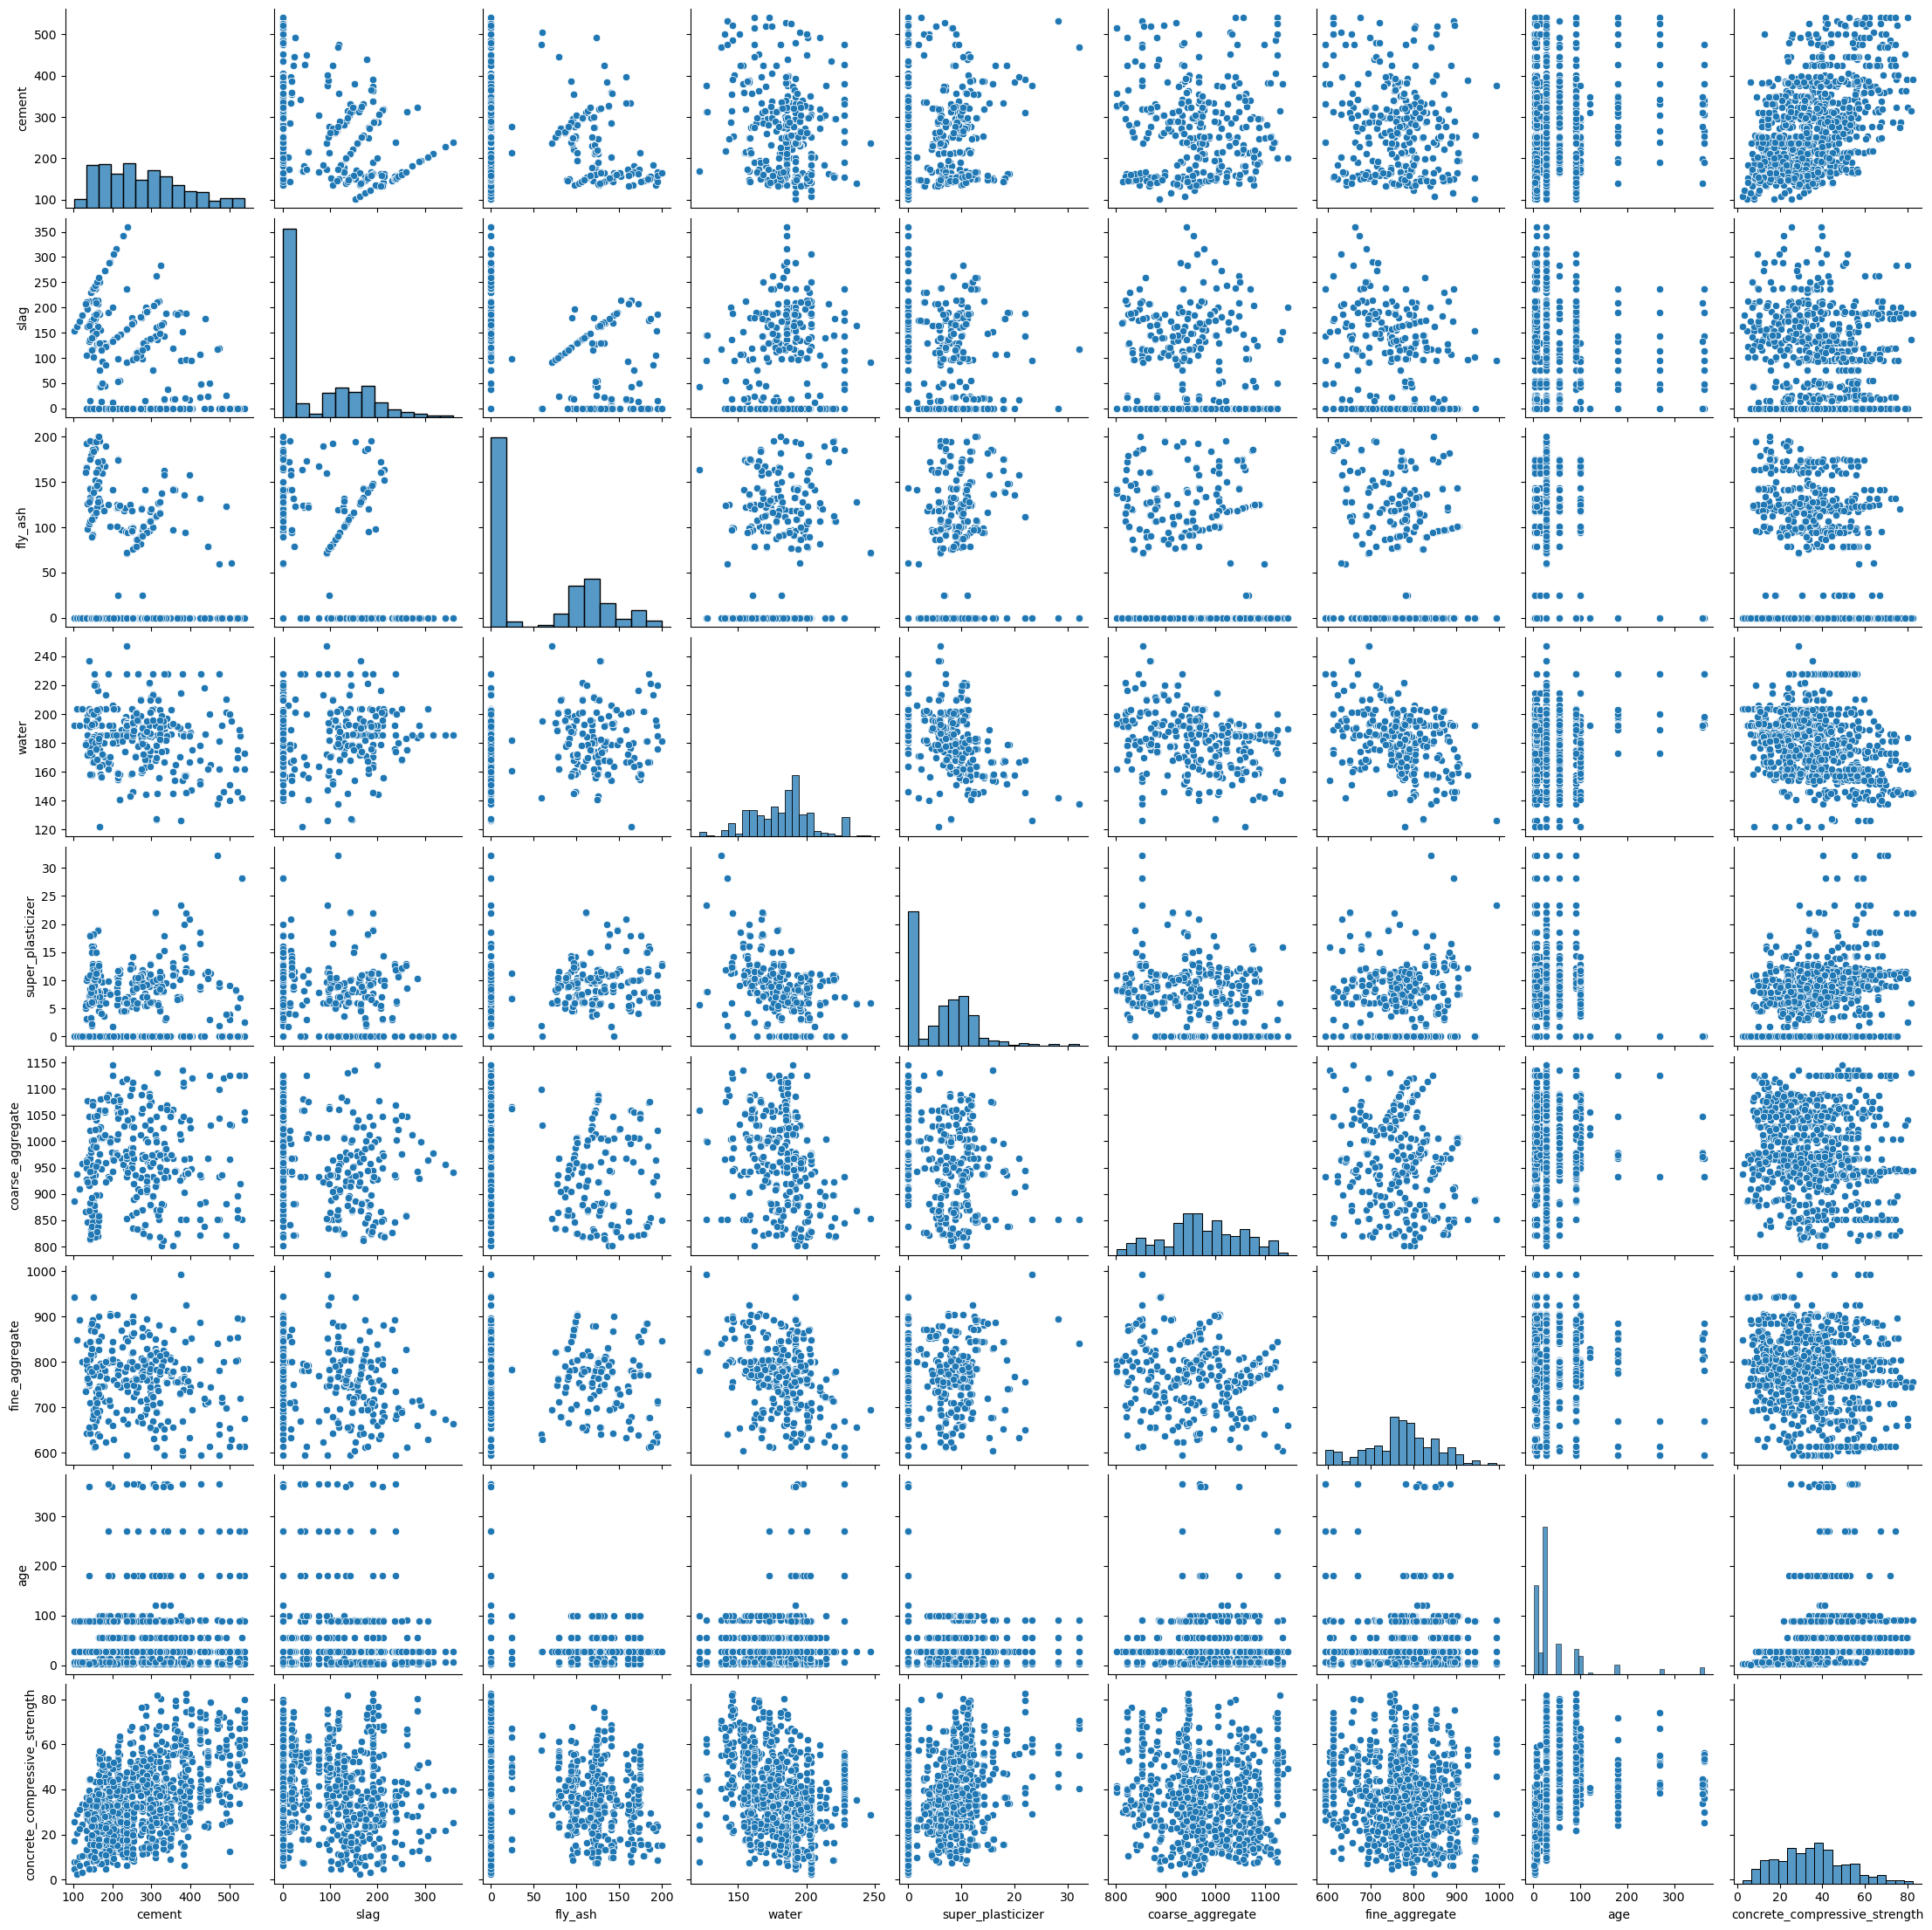

In [61]:
sns.pairplot(df)

The pair plot gives a visual representation of correlations between all the features.

### Checking for Outliers:

<AxesSubplot:>

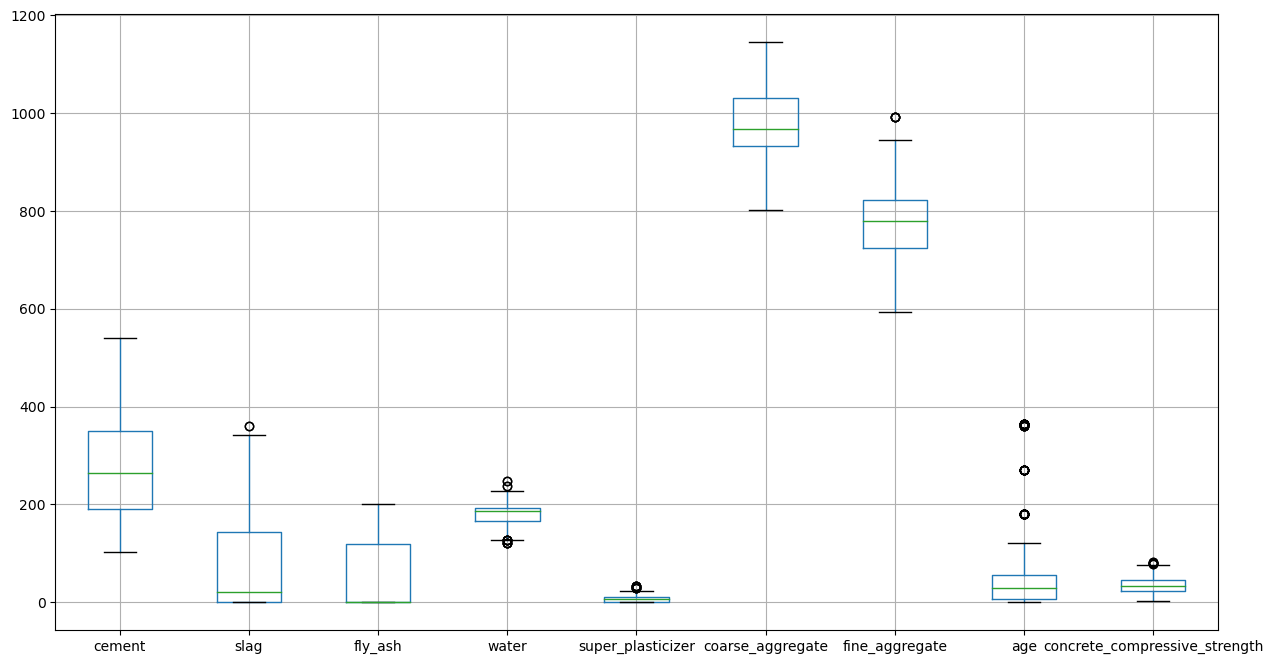

In [34]:
#checking for outliers : using boxplot

df.boxplot(figsize=(15,8))

from above boxplots we can clearly observe that outliners are present in 

water,super_platicizer,age and fine_aggregate

### Removing outliers

In [35]:
df1=df.copy()

In [36]:
#Number of outliers present in the dataset
# using z-score = i-mean/std
#thershold=3
#ouliers : abs(zscore>thershold)

print('Number of outliers in cement: ',df1[((df1.cement - df1.cement.mean()) / df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',df1[((df1.slag - df1.slag.mean()) / df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in fly_ash: ',df1[((df1.fly_ash - df1.fly_ash.mean()) / df1.fly_ash.std()).abs() >3]['fly_ash'].count())
print('Number of outliers in water: ',df1[((df1.water - df1.water.mean()) / df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplasticizer: ',df1[((df1.super_plasticizer - df1.super_plasticizer.mean()) / df1.super_plasticizer.std()).abs() >3]['super_plasticizer'].count())
print('Number of outliers in coarse_agg: ',df1[((df1.coarse_aggregate - df1.coarse_aggregate.mean()) / df1.coarse_aggregate.std()).abs() >3]['coarse_aggregate'].count())
print('Number of outliers in fine_agg: ',df1[((df1.fine_aggregate - df1.fine_aggregate.mean()) / df1.fine_aggregate.std()).abs() >3]['fine_aggregate'].count())
print('Number of outliers in age: ',df1[((df1.age - df1.age.mean()) / df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in fly_ash:  0
Number of outliers in water:  2
Number of outliers in superplasticizer:  10
Number of outliers in coarse_agg:  0
Number of outliers in fine_agg:  0
Number of outliers in age:  33


Here we have used z-score method to find outliers with thershold = 3

In [70]:
#Handling the outliers
#Replacing the outliers by median

for col_name in df1.columns[:-1]:
    q1 = df1[col_name].quantile(0.25)
    q3 = df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df1.loc[(df1[col_name] < low) | (df1[col_name] > high), col_name] = df1[col_name].median()

In [71]:
## box plot after handing outliers

<AxesSubplot:>

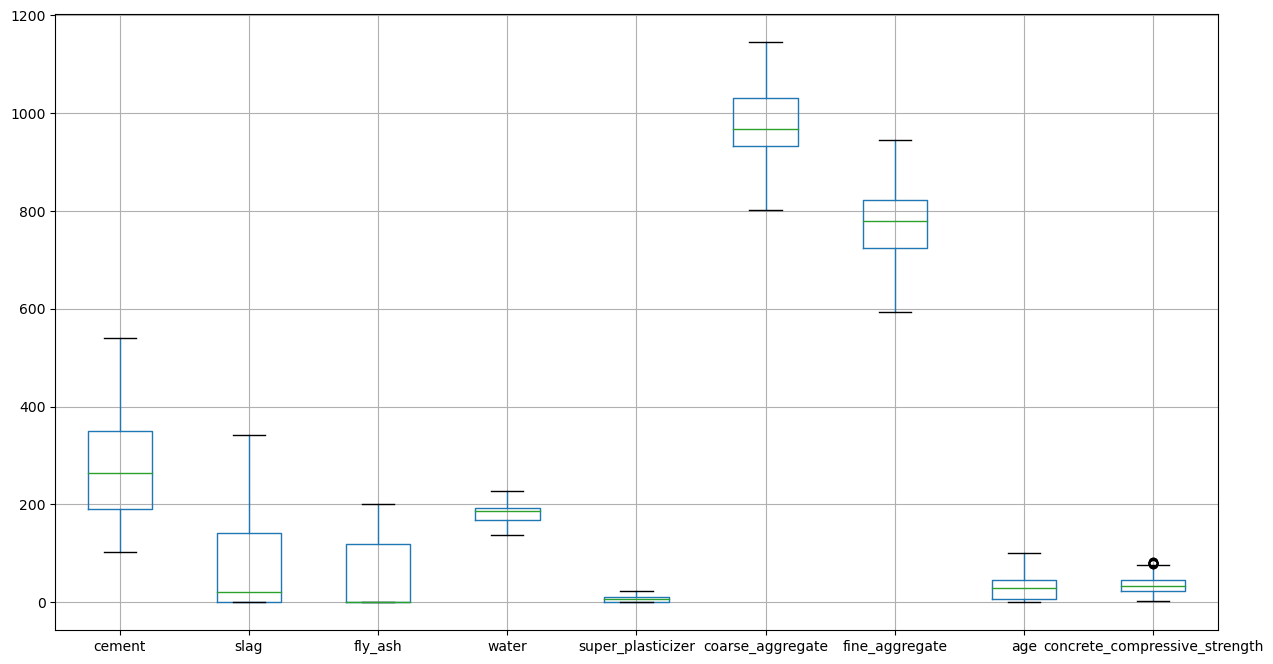

In [72]:
df1.boxplot(figsize=(15,8))

comparing 2 boxplot results we can observe that there are significant decrease in outliers

In [73]:
## Information after removing outliers:

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.000000,349.000000,540.0
slag,1005.0,71.471629,85.209102,0.00,0.00,20.000000,141.300000,342.1
fly_ash,1005.0,55.536318,64.207969,0.00,0.00,0.000000,118.300000,200.1
water,1005.0,182.526000,20.034653,137.80,168.00,185.700000,192.000000,228.0
super_plasticizer,1005.0,5.792768,5.397335,0.00,0.00,6.033234,9.900000,23.4
coarse_aggregate,1005.0,974.376816,77.579667,801.00,932.00,968.000000,1031.000000,1145.0
fine_aggregate,1005.0,771.594170,78.819698,594.00,724.30,779.300000,822.000000,945.0
age,1005.0,32.891091,27.419722,1.00,7.00,28.000000,45.856716,100.0
concrete_compressive_strength,1005.0,35.250378,16.284815,2.33,23.52,33.800000,44.870000,82.6


# Performing hypothesis testing to find the significant variables:



Hypothesis :

H0 (Null Hypothesis) : There is no significant relationship between the 
variables being tested. (rho=0)

H1 (Alternative Hypothesis) : There is a significant relationship between the variables being tested.(rho!=0)

Consider significance level as 0.05

In [106]:
## concrete compressive strength vs cement

alpha = 0.05

statistical_result = pd.DataFrame(columns = ['Columns','Pvalue','Remarks'])

col = ['cement','slag','fly_ash','water','super_plasticizer','coarse_aggregate','fine_aggregate','age']

for i in col:

    stats,pval = st.pearsonr(df1.concrete_compressive_strength,df1[i])
    
    if pval <= 0.05:
        Remarks = "Reject H0"
    else:
        Remarks = "Failed to reject H0"
        
    statistical_result = statistical_result.append({'Columns': i,'Pvalue':pval,'Remarks':Remarks},ignore_index=True)
    
statistical_result    
    
                                                    

,Columns,Pvalue,Remarks
0,cement,2.462066e-61,Reject H0
1,slag,7.900856e-04,Reject H0
2,fly_ash,1.053756e-02,Reject H0
3,water,2.584476e-19,Reject H0
4,super_plasticizer,3.872031e-25,Reject H0
5,coarse_aggregate,4.097881e-06,Reject H0
6,fine_aggregate,7.719390e-11,Reject H0
7,age,4.337682e-71,Reject H0


Here p_value (~0) < aplha (0.05)

Insights from statistical test:

    From above performed statistical tests we can conclude that all of the columns has rejected null hypotheses which means  
    the columns are significant to the target variable compressive_strength

### Correlation :

correlation table:  range -1 to +1

    perfect -ve : -1
    
    strong  -ve : -1 to -0.75
    
    moderate -ve: -0.75 to 0.3
    
    week     -ve: -0.3 to 0
    
        Netural : 0
   
    week     +ve: 0 to 0.3
    
    moderate +ve: 0.3 to 0.75
    
    strong   +ve: 0.75 to 1
    
    perfect  +ve: 1

In [90]:
## Displaying correlation of each variable with concrete compressive strength

df1.corr().iloc[-1].to_frame()

,concrete_compressive_strength
cement,0.488283
slag,0.105704
fly_ash,-0.080648
water,-0.278161
super_plasticizer,0.318562
coarse_aggregate,-0.144717
fine_aggregate,-0.203330
age,0.521230
concrete_compressive_strength,1.000000


We can plot scatter plots between concrete_compressive_Strength and other features to see more complex relations.



<AxesSubplot:xlabel='cement', ylabel='concrete_compressive_strength'>

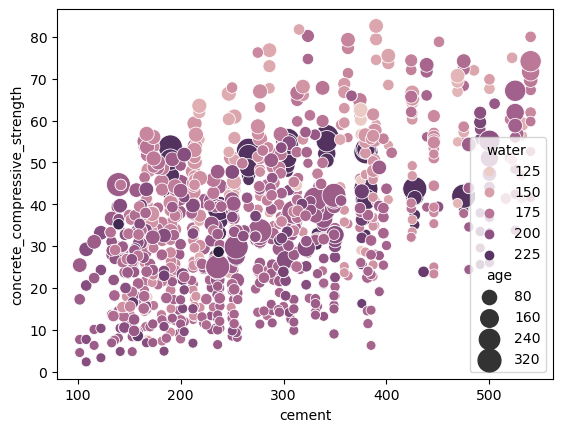

In [65]:
## concrete_compressive_strength vs (cement, age, water)

sns.scatterplot(y="concrete_compressive_strength", x="cement", hue="water",size="age", data=df,  sizes=(50, 300))

The observations we can make from this plot,


  1. Compressive strength increases as the amount of cement increases, as the dots move up when we move towards right on the x-axis.
  
  
  2. Compressive strength increases with age (as the size of dots represents the age), this not the case always but can be up to an extent.
  
  
  3. Cement with less age requires more cement for higher strength, as the smaller dots are moving up when we move towards right on the x-axis.
  
  
  4. The older the cement is the more water it requires, can be confirmed by observing the colour of the dots. Larger dots with dark colour indicate high age and more water.
  
  
  5. Concrete strength increases when less water is used in preparing it since the dots on the lower side (y-axis) are darker and the dots on higher-end (y-axis) are brighter.

<AxesSubplot:xlabel='fine_aggregate', ylabel='concrete_compressive_strength'>

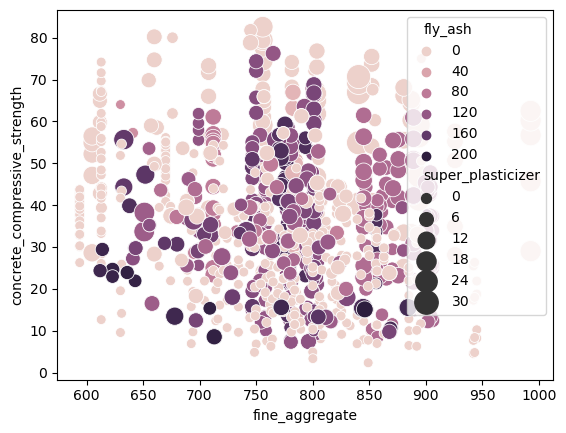

In [67]:
## concrete compressive Strength vs (Fine aggregate, Super Plasticizer, Fly Ash)

sns.scatterplot(y="concrete_compressive_strength", x="fine_aggregate", hue="fly_ash",
   size="super_plasticizer", data=df, sizes=(50, 300))

Observations:

  1. Compressive strength decreases Fly ash increases, as darker dots are concentrated in the region representing low compressive strength.


  2. Compressive strength increases with Superplasticizer since larger the dot the higher they are in the plot.